# Case Study: Customer Analysis

Abstract

The objective of this data is to understand customer demographics and buying behavior. Later during the week, we will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.

# Data types and its description

Variable	Description

1. Customer	Customer ID (unique record identifier)
2. State	
3. Customer Lifetime Value
4. Response	response rate from the customer
5. Coverage	
6. Education	
7. Effective To Date	
8. EmploymentStatus
9. Gender
10. Income	
11. Location_code
12. Marital Status
13. Monthly Premium Auto
14. Months since last claim
15. Months since policy inception
16. Number of open complaints
17. Number of policies
18. Policy type
19. Policy
20. Renew offer type
21. Sales channel
22. Total claim amount
23. Vehicle class
24. Vehicle size
25. Vehicle type

In [1]:
import pandas as pd
import numpy as np

# Round 2 - Reading marketing_customer_analysis.csv file

In [142]:
file = pd.read_csv("marketing_customer_analysis.csv")
display(file.shape)
file.head(5).T

(10910, 26)

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Customer,DK49336,KX64629,LZ68649,XL78013,QA50777
State,Arizona,California,Washington,Oregon,Oregon
Customer Lifetime Value,4809.21696,2228.525238,14947.9173,22332.43946,9025.067525
Response,No,No,No,Yes,No
Coverage,Basic,Basic,Basic,Extended,Premium
Education,College,College,Bachelor,College,Bachelor
Effective To Date,2/18/11,1/18/11,2/10/11,1/11/11,1/17/11
EmploymentStatus,Employed,Unemployed,Employed,Employed,Medical Leave
Gender,M,F,M,M,F


# Round 3 - Cleaning/Wrangling/EDA

# Dropped unnamed column

In [3]:
file = file.drop(["Unnamed: 0"], axis = 1)
display(file)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


# Deleting duplicates

In [4]:
file = file.drop_duplicates()
file = file.reset_index()
display(file.shape)
file.head()

(10873, 26)

,index,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Number of rows and columns in dataframe.

In [5]:
print("Number of rows are {0} and number of columns are {1} ".format(file.shape[0], file.shape[1]))

Number of rows are 10873 and number of columns are 26 


# Which columns are numerical?

In [6]:
# These are numerical columns
file._get_numeric_data()
# data.select_dtypes(include=np.number) 

,index,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10868,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10869,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10870,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10871,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


# Which columns are categorical?

In [7]:
file.select_dtypes("object")

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10869,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10870,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10871,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
file.isna().sum()

index                               0
Customer                            0
State                             614
Customer Lifetime Value             0
Response                          614
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           623
Months Since Policy Inception       0
Number of Open Complaints         623
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     608
Vehicle Size                      608
Vehicle Type                     5465
dtype: int64

# Changed the column titles to lower.

In [9]:
file.columns = [column.lower().replace(" ", "_") for column in file.columns]
file.head()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Dealing with NAs in state column.

In [10]:
frequent_states = file["state"].value_counts(dropna = True)
frequent_states

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: state, dtype: int64

Decision: As California is the most recurring state, the NaN will be replaced by this value.

In [11]:
file["state"] = file["state"].fillna(frequent_states.keys()[0])

file.head()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [12]:
# Checking NaN for state.

file["state"].isna().sum()

0

# Dealing with NAs in reponse column.

In [13]:
frequent_response = file["response"].value_counts()
frequent_response

No     8795
Yes    1464
Name: response, dtype: int64

Decision: As No is the most recurring reponse, the NaN will be replaced by this value.

In [14]:
file["response"] = file["response"].fillna(frequent_response.keys()[0])

In [15]:
# Checking NaN for reponse.

file["response"].isna().sum()

0

In [16]:
file.head()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Dealing with NaN in Months Since Last Claim column.

In [17]:
file["months_since_last_claim"].value_counts()

3.0     426
6.0     394
1.0     386
7.0     377
4.0     372
2.0     365
5.0     354
0.0     353
10.0    345
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    306
17.0    298
14.0    297
19.0    275
9.0     275
23.0    273
25.0    269
21.0    267
18.0    257
20.0    254
22.0    245
24.0    236
29.0    233
28.0    225
31.0    219
26.0    211
27.0    207
30.0    201
34.0    199
33.0    198
35.0    156
32.0    155
Name: months_since_last_claim, dtype: int64

In [18]:
print(file["months_since_last_claim"].mode())
print(file["months_since_last_claim"].mean())
print(file["months_since_last_claim"].median())

0    3.0
Name: months_since_last_claim, dtype: float64
15.145073170731708
14.0


Decision: Although 3 is the most recurring number, I wont replace NaN with 3 because the range of column varies from 3 to 35. 
Instead I will replace with mean/median. Maybe it might reduce the chance of skewing the data.

In [19]:
file["months_since_last_claim"] = file["months_since_last_claim"].fillna(file["months_since_last_claim"].median())

In [20]:
file["months_since_last_claim"].isna().sum()

0

# Dealing with NaN in number of open complaints column

In [21]:
print(file["number_of_open_complaints"].mode())
print(file["number_of_open_complaints"].mean())
print(file["number_of_open_complaints"].median())

0    0.0
Name: number_of_open_complaints, dtype: float64
0.3835121951219512
0.0


In [22]:
frequent_complaints = file["number_of_open_complaints"].value_counts()
frequent_complaints

0.0    8141
1.0    1141
2.0     414
3.0     321
4.0     166
5.0      67
Name: number_of_open_complaints, dtype: int64

Decision: As 0 is the most frequent value in this column, so NaN will be replace by 0.

In [23]:
file["number_of_open_complaints"] = file["number_of_open_complaints"].fillna(frequent_complaints.keys()[0])
file["number_of_open_complaints"].isna().sum()

0

In [24]:
file.isna().sum()

index                               0
customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64

# Dealing with NaN in vehicle_class column

In [25]:
frequent_vehicle_class = file["vehicle_class"].value_counts(dropna = False)
frequent_vehicle_class

Four-Door Car    5200
Two-Door Car     2112
SUV              2009
NaN               608
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [26]:
file.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,10873.0,NaN,NaN,NaN,5449.14467,3150.859497,0.0,2719.0,5443.0,8177.0,10909.0
customer,10873,9134,DQ50258,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,10873,5,California,4162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,10873.0,NaN,NaN,NaN,8016.88172,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.38119
response,10873,2,No,9409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,10873,3,Basic,6635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10873,5,Bachelor,3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,10873,59,1/27/11,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,10873,5,Employed,6764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10873,2,F,5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Decision: As the value_counts() and describe() shows that Four door car is the most frequent value than others. 
Hence substituting that value for NaN.

In [27]:
file["vehicle_class"] = file["vehicle_class"].fillna(frequent_vehicle_class.keys()[0])

In [28]:
file["vehicle_class"].isna().sum()

0

# Dealing with NaN in vehicle_size column

In [29]:
file["vehicle_size"].isna().sum()

608

In [30]:
frequent_vehicle_size= file["vehicle_size"].value_counts()
frequent_vehicle_size

Medsize    7233
Small      1962
Large      1070
Name: vehicle_size, dtype: int64

Decision: As the value_counts() and describe() shows that Med_size car is the most frequent value than others. 
    Hence substituting that value for NaN.

In [31]:
file["vehicle_size"] = file["vehicle_size"].fillna(frequent_vehicle_size.keys()[0])
file["vehicle_size"].isna().sum()

0

# Dealing with NaN in vehicle_type column

In [32]:
# Have to comment it, since I have updated the excel sheet with the clean data. So rerunning this will give errors.
# frequent_type = file["vehicle_type"].value_counts()
# frequent_type
# file.columns

Decision: As 50 % of the data is Nan I will drop the column. Else the details can be asked to client.

In [33]:
# Please refer to above comment.
# file = file.drop(["vehicle_type"], axis = 1)

In [34]:
# Now there are no NaN 
file.isna().sum()

index                               0
customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
vehicle_type                     5465
dtype: int64

# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [35]:
file.head(2).T

,0,1
index,0,1
customer,DK49336,KX64629
state,Arizona,California
customer_lifetime_value,4809.21696,2228.525238
response,No,No
coverage,Basic,Basic
education,College,College
effective_to_date,2/18/11,1/18/11
employmentstatus,Employed,Unemployed
gender,M,F


In [36]:
file.dtypes

index                              int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [37]:
months = []

for date in file["effective_to_date"]:
    date_converted = pd.to_datetime(date)
    months.append(date_converted.strftime("%B"))
    
file["Months"] = months

In [38]:
# Months Column appear at the last position in dataframe.

file.head(3).T

,0,1,2
index,0,1,2
customer,DK49336,KX64629,LZ68649
state,Arizona,California,Washington
customer_lifetime_value,4809.21696,2228.525238,14947.9173
response,No,No,No
coverage,Basic,Basic,Basic
education,College,College,Bachelor
effective_to_date,2/18/11,1/18/11,2/10/11
employmentstatus,Employed,Unemployed,Employed
gender,M,F,M


In [39]:
display(file["Months"].value_counts())

file[file["Months"].isin(["January", "February", "March"])]

January     5799
February    5074
Name: Months, dtype: int64

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,Months
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January
10869,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10870,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February
10871,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February


# Merging the cleaned data into the excel sheet

In [40]:
file.to_csv("cleaned_marketing_customer.csv", index = False)

# Exploratory Data Analysis

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
 file.describe().T

,count,mean,std,min,25%,50%,75%,max
index,10873.0,5449.144670,3150.859497,0.000000,2719.000000,5443.000000,8177.000000,10909.000000
customer_lifetime_value,10873.0,8016.881720,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.381190
income,10873.0,37537.101444,30362.078350,0.000000,0.000000,33811.000000,62262.000000,99981.000000
monthly_premium_auto,10873.0,93.216684,34.454801,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10873.0,15.079463,9.789475,0.000000,7.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10873.0,48.098777,27.929932,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10873.0,0.361538,0.889177,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10873.0,2.977467,2.397752,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10873.0,434.902879,292.233402,0.099007,271.014511,383.363758,547.200000,2893.239678


In [43]:
file.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,10873.0,NaN,NaN,NaN,5449.14467,3150.859497,0.0,2719.0,5443.0,8177.0,10909.0
customer,10873,9134,DQ50258,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,10873,5,California,4162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_lifetime_value,10873.0,NaN,NaN,NaN,8016.88172,6884.829202,1898.007675,4014.453113,5768.830622,8996.774075,83325.38119
response,10873,2,No,9409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coverage,10873,3,Basic,6635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10873,5,Bachelor,3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
effective_to_date,10873,59,1/27/11,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employmentstatus,10873,5,Employed,6764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10873,2,F,5554,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
file.dtypes

index                              int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

# Show a plot of the total number of responses

In [45]:
file["response"].value_counts()

No     9409
Yes    1464
Name: response, dtype: int64

<Axes: xlabel='response', ylabel='count'>

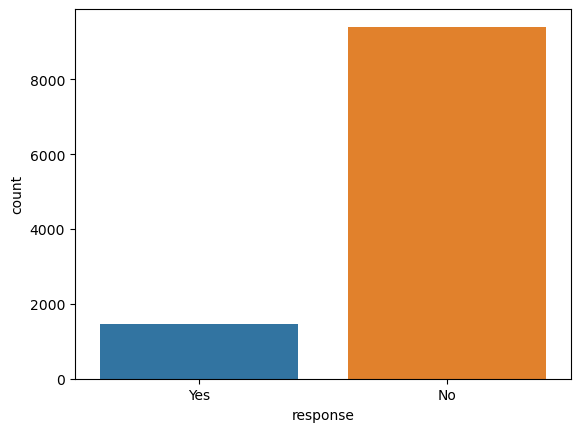

In [46]:
sns.countplot(data = file, x = "response", order = ["Yes", "No"])

INSIGHT: The graph shows that Yes has very less response that No. It seems Yes has 1400 counts and No has 9000 approx counts

# Show a plot of the response rate by the sales channel.

In [47]:
def response_rate(response):
    if response == "Yes":
        return 1
    else: 
        return 0
    
file["response_rate"] = [response_rate(response) for response in file["response"]]

# Alternate way to above function
# file["response_rate"] = np.where(file["Response"] == "Yes", 1, 0)

In [48]:
file.head(5).T
file.loc[[2,3],["response_rate"]]

,response_rate
2,0
3,1


<Axes: xlabel='sales_channel', ylabel='response_rate'>

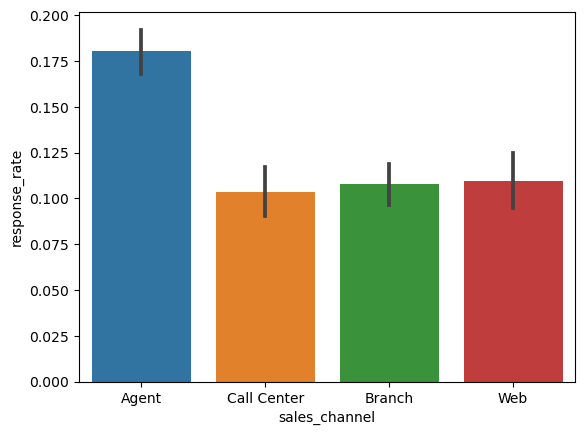

In [49]:
# This plots Yes and No
# sns.countplot(data = file, x = "sales_channel", hue = "response_rate")

sns.barplot(data = file, x = "sales_channel", y = "response_rate")

# plt.show()

INSIGHT: The graph shows that Agent sales channel has more response rate compared to others. 
    Web, Branch and Call Center have values relatively very close.

# Show a plot of the response rate by the total claim amount.

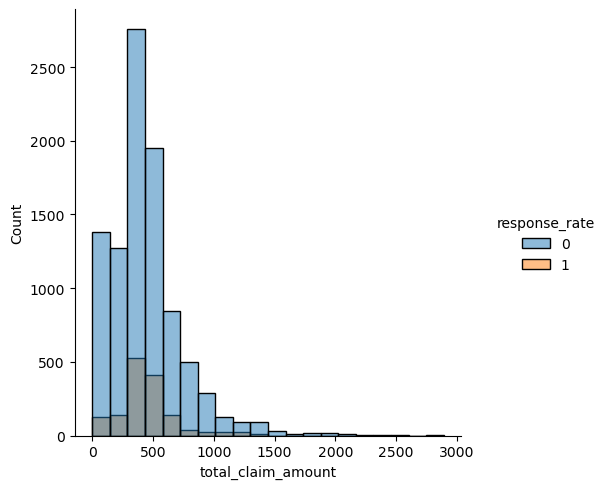

In [50]:
sns.displot(file, x = 'total_claim_amount', hue = 'response_rate', bins=20)

INSIGHT: The data is quite skewed to left. It shows that the major response and reponse rate is between 250 and 600 total claim amount.
    

# Show a plot of the response rate by income.

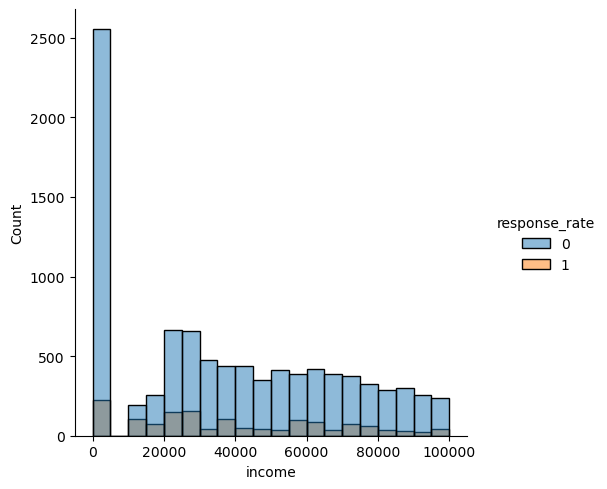

In [51]:
sns.displot(file, x = 'income', hue = 'response_rate', bins=20)

INSIGHT: The response and response rate is highest for income range between 0 and 5000. 
    After the dip at 5000, the data has slight curve which is more towards left. 
    Among them the response rate from 20000 and 30000 is quite good. Then 55000 and 65000 group has response rate.
    

# Round 4 - Processing Data

# Check the data types of the columns. 
Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 

In [52]:
file.dtypes

index                              int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [53]:
# Separating numeric columns.

numerical = file.select_dtypes(include = np.number)
numerical.head(3).T

# Seems there 9 numeric columns.

,0,1,2
index,0.00000,1.000000,2.0000
customer_lifetime_value,4809.21696,2228.525238,14947.9173
income,48029.00000,0.000000,22139.0000
monthly_premium_auto,61.00000,64.000000,100.0000
months_since_last_claim,7.00000,3.000000,34.0000
months_since_policy_inception,52.00000,26.000000,31.0000
number_of_open_complaints,0.00000,0.000000,0.0000
number_of_policies,9.00000,1.000000,2.0000
total_claim_amount,292.80000,744.924331,480.0000
response_rate,0.00000,0.000000,0.0000


In [54]:
# Separating categorical columns.

categorical = file.select_dtypes(include = object)
categorical.head(3).T

,0,1,2
customer,DK49336,KX64629,LZ68649
state,Arizona,California,Washington
response,No,No,No
coverage,Basic,Basic,Basic
education,College,College,Bachelor
effective_to_date,2/18/11,1/18/11,2/10/11
employmentstatus,Employed,Unemployed,Employed
gender,M,F,M
location_code,Suburban,Suburban,Suburban
marital_status,Married,Single,Single


# Checking normality of the numerical variables visually

# Use seaborn library to construct distribution plots for the numerical variables

Index(['index', 'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'response_rate'],
      dtype='object')

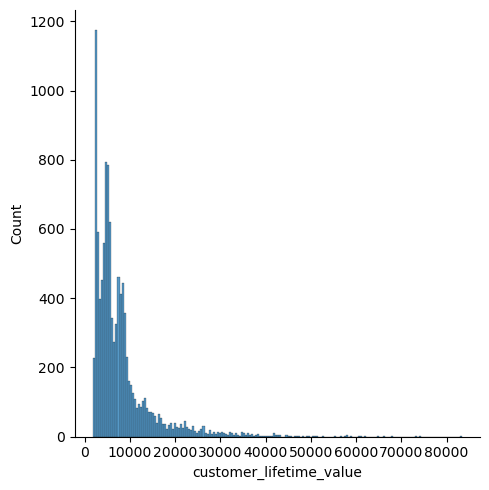

In [55]:
display(numerical.columns)

sns.displot(file["customer_lifetime_value"])

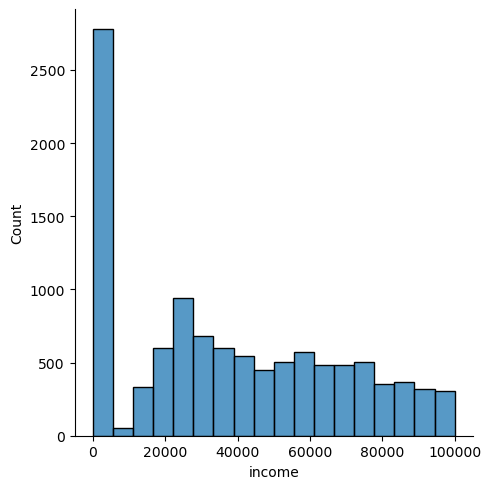

In [56]:
sns.displot(file["income"])


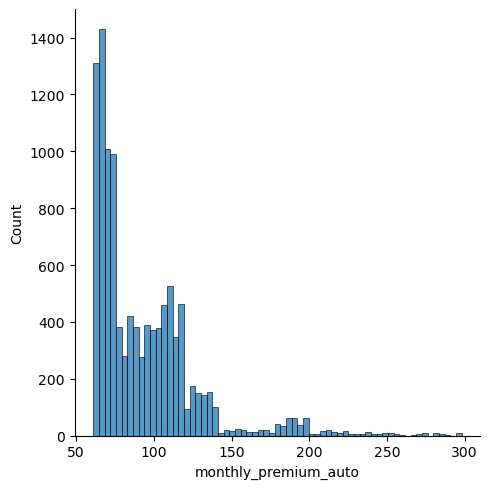

In [57]:
sns.displot(file["monthly_premium_auto"])

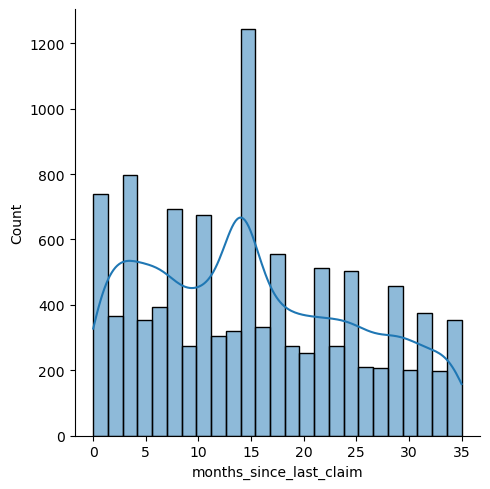

In [115]:
sns.displot(file["months_since_last_claim"], kde = True)

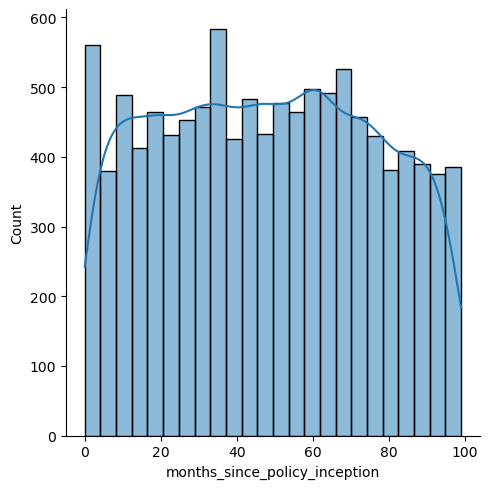

In [116]:
sns.displot(file["months_since_policy_inception"], kde = True)


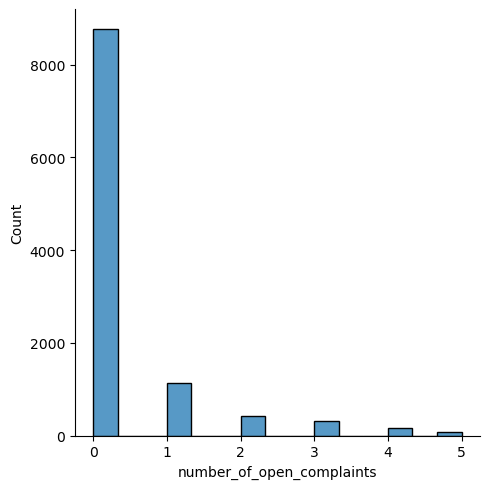

In [60]:
sns.displot(file["number_of_open_complaints"])

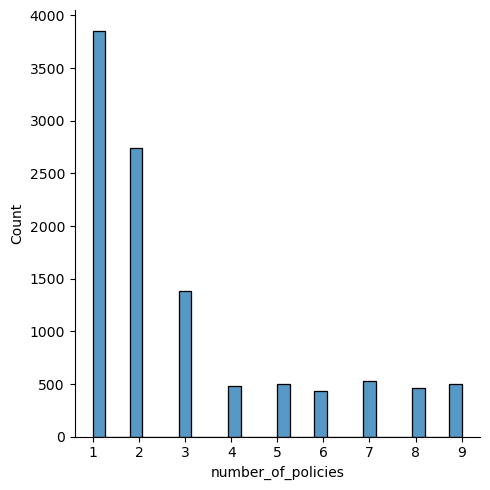

In [61]:
sns.displot(file["number_of_policies"])


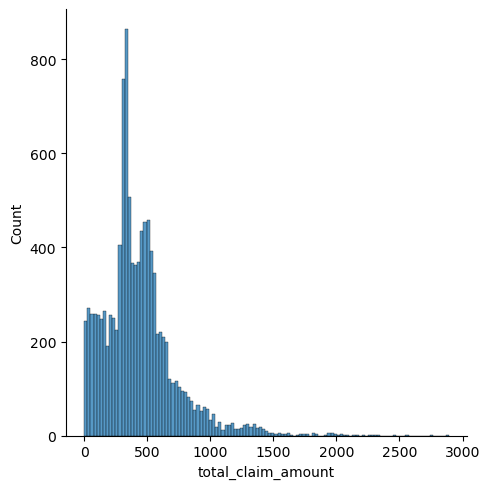

In [62]:
sns.displot(file["total_claim_amount"])

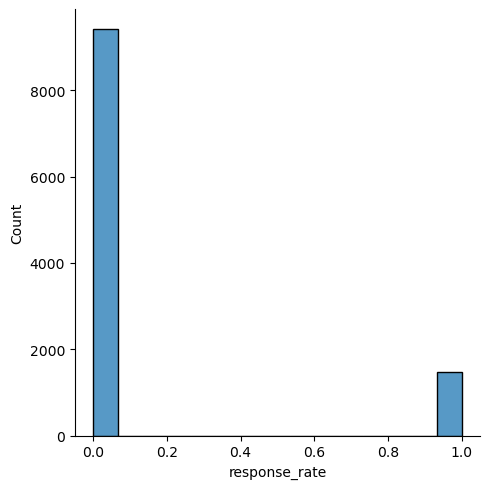

In [63]:
sns.displot(file["response_rate"])

# Use Matplotlib to construct histograms

<Axes: >

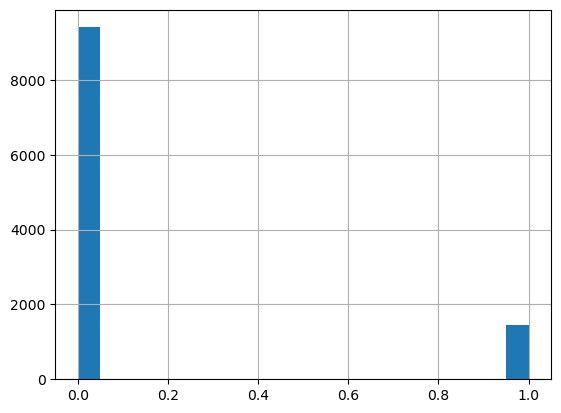

In [64]:
file["response_rate"].hist(bins = 20)

<Axes: >

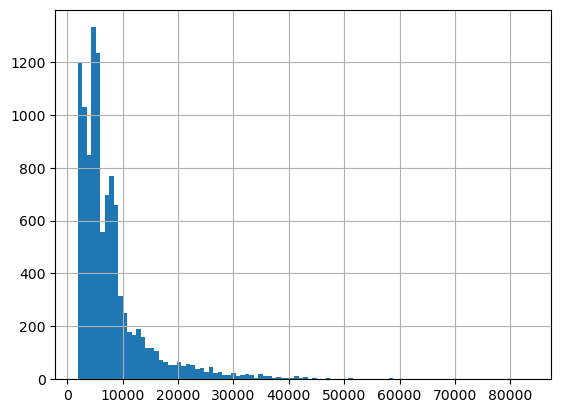

In [65]:
file["customer_lifetime_value"].hist(bins = 100)

<Axes: >

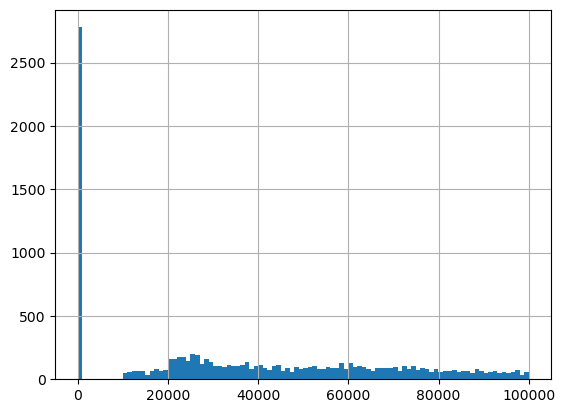

In [66]:
file["income"].hist(bins = 100)

<Axes: >

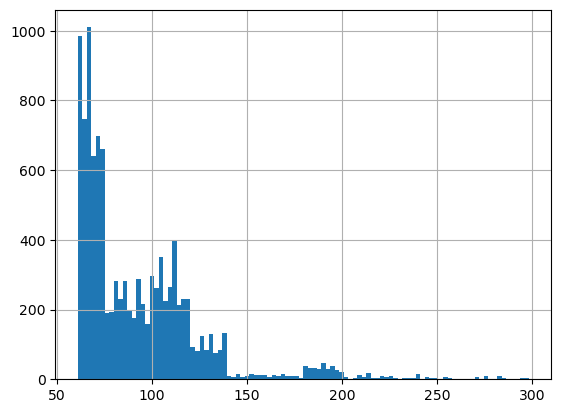

In [117]:
file["monthly_premium_auto"].hist(bins = 100)

<Axes: >

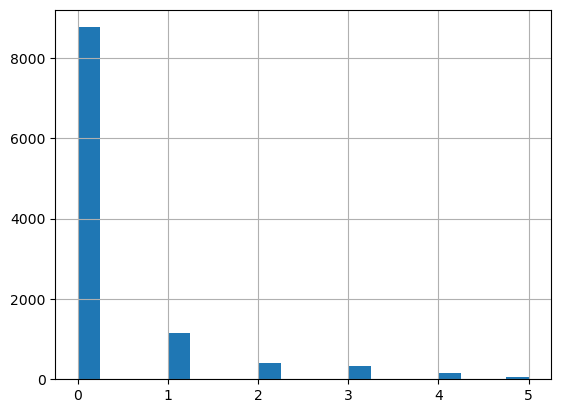

In [68]:
file["number_of_open_complaints"].hist(bins = 20)

<Axes: >

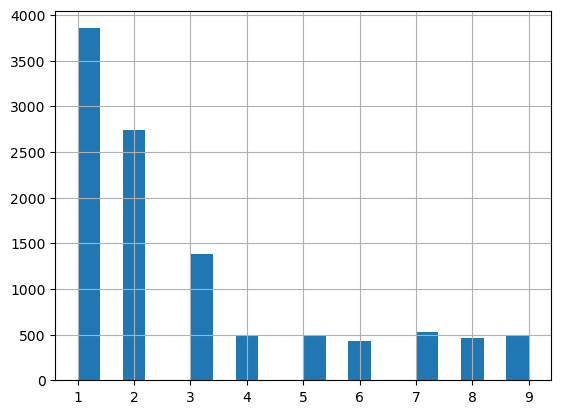

In [69]:
file["number_of_policies"].hist(bins = 20)

<Axes: >

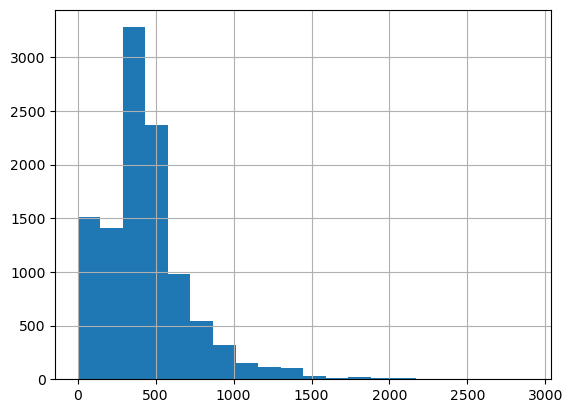

In [70]:
file["total_claim_amount"].hist(bins = 20)

# Distributions for different numerical variables look like a normal distribution.

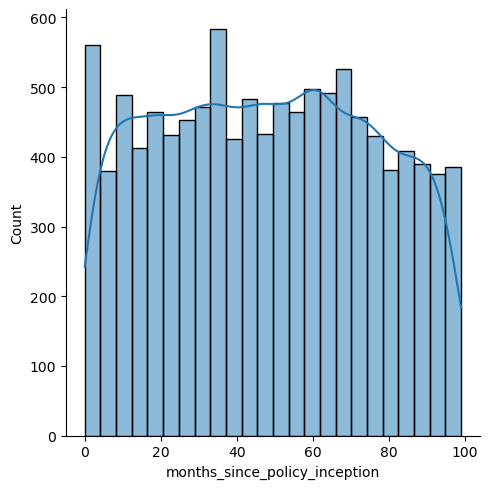

In [71]:
sns.displot(file["months_since_policy_inception"], kde = True)

INSIGHT: The above graph has curve close to normal distribution. And other column don't have normal distribution

# Checking the multicollinearity between the features. 

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response_rate
index,1.000000,0.001277,0.009187,0.000495,0.007843,0.013393,0.008540,0.002720,-0.001468,-0.010268
customer_lifetime_value,0.001277,1.000000,0.027354,0.402617,0.016038,0.016709,-0.030861,0.016428,0.232583,-0.007828
income,0.009187,0.027354,1.000000,-0.009929,-0.022675,-0.005992,0.007776,-0.010831,-0.354613,0.011659
monthly_premium_auto,0.000495,0.402617,-0.009929,1.000000,0.008356,0.019339,-0.009180,-0.020300,0.631372,0.013457
months_since_last_claim,0.007843,0.016038,-0.022675,0.008356,1.000000,-0.037628,0.004223,0.007428,0.011952,-0.014872
months_since_policy_inception,0.013393,0.016709,-0.005992,0.019339,-0.037628,1.000000,0.005043,-0.010445,0.003780,-0.005090
number_of_open_complaints,0.008540,-0.030861,0.007776,-0.009180,0.004223,0.005043,1.000000,0.002570,-0.011653,-0.004028
number_of_policies,0.002720,0.016428,-0.010831,-0.020300,0.007428,-0.010445,0.002570,1.000000,-0.008702,-0.018431
total_claim_amount,-0.001468,0.232583,-0.354613,0.631372,0.011952,0.003780,-0.011653,-0.008702,1.000000,0.016232
response_rate,-0.010268,-0.007828,0.011659,0.013457,-0.014872,-0.005090,-0.004028,-0.018431,0.016232,1.000000


<Axes: >

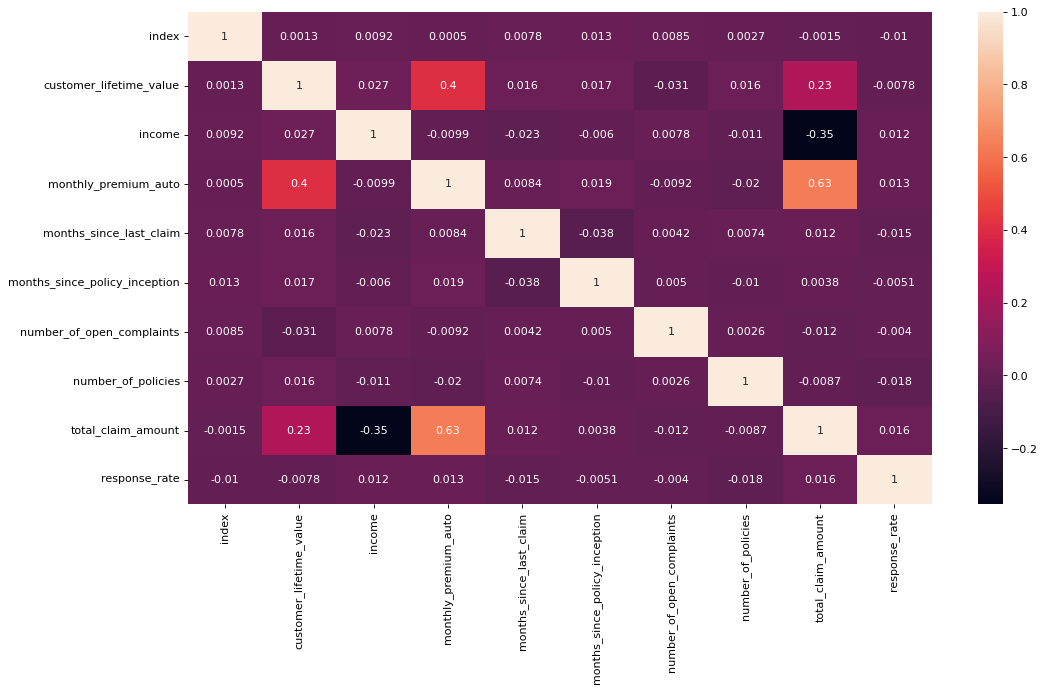

In [120]:
from matplotlib.pyplot import figure

figure(figsize=(15, 8), dpi=80)

display(numerical.corr().T)
correlation_matrix = numerical.corr()
sns.heatmap(correlation_matrix, annot = True)

INSIGHT: After reviewing the correlation matrix and heat map, I didn't find any correlation among features greater than 0.9. 
    So there is no need to delete any on the features.

In [73]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

# Creating target and feature columns

In [74]:
X = numerical.copy() # features
X = X.drop(["total_claim_amount"], axis = 1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [75]:
y = numerical["total_claim_amount"] #target
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10868    1214.400000
10869     273.018929
10870     381.306996
10871     618.288849
10872    1021.719397
Name: total_claim_amount, Length: 10873, dtype: float64

In [76]:
display(X.head(3).T)

,0,1,2
index,0.00000,1.000000,2.0000
customer_lifetime_value,4809.21696,2228.525238,14947.9173
income,48029.00000,0.000000,22139.0000
monthly_premium_auto,61.00000,64.000000,100.0000
months_since_last_claim,7.00000,3.000000,34.0000
months_since_policy_inception,52.00000,26.000000,31.0000
number_of_open_complaints,0.00000,0.000000,0.0000
number_of_policies,9.00000,1.000000,2.0000
response_rate,0.00000,0.000000,0.0000


In [77]:
display(y.head(3))

0    292.800000
1    744.924331
2    480.000000
Name: total_claim_amount, dtype: float64

# Normalization

In [78]:
scaler = MinMaxScaler().fit(X_num)
x_normalized = scaler.transform(X_num)
print(x_normalized.shape)
x_normalized
scaled_df = pd.DataFrame(x_normalized, columns=X.columns)
scaled_df.head(5).T

(10873, 9)


,0,1,2,3,4
index,0.000000,0.000092,0.000183,0.000275,0.000367
customer_lifetime_value,0.035752,0.004059,0.160264,0.250953,0.087527
income,0.480381,0.000000,0.221432,0.490873,0.236795
monthly_premium_auto,0.000000,0.012658,0.164557,0.151899,0.236287
months_since_last_claim,0.200000,0.085714,0.971429,0.285714,0.400000
months_since_policy_inception,0.525253,0.262626,0.313131,0.030303,0.313131
number_of_open_complaints,0.000000,0.000000,0.000000,0.000000,0.000000
number_of_policies,1.000000,0.000000,0.125000,0.125000,0.750000
response_rate,0.000000,0.000000,0.000000,1.000000,0.000000


In [79]:
standard_scaler = StandardScaler().fit(X)
x_standardized = standard_scaler.transform(X)
print(x_standardized.shape)
X_num_df = pd.DataFrame(x_standardized, columns=X.columns)
# X_num_df = X_num_df.drop(["index"], axis = 1)
X_num_df.head(5).T

(10873, 9)


,0,1,2,3,4
index,-1.729495,-1.729177,-1.728860,-1.728543,-1.728225
customer_lifetime_value,-0.465925,-0.840779,1.006758,2.079386,0.146443
income,0.345575,-1.236372,-0.507172,0.380126,-0.456581
monthly_premium_auto,-0.935085,-0.848010,0.196885,0.109810,0.690308
months_since_last_claim,-0.825359,-1.233980,1.932832,-0.518894,-0.110273
months_since_policy_inception,0.139685,-0.791258,-0.612231,-1.614786,-0.612231
number_of_open_complaints,-0.406617,-0.406617,-0.406617,-0.406617,-0.406617
number_of_policies,2.511857,-0.824755,-0.407678,-0.407678,1.677704
response_rate,-0.394456,-0.394456,-0.394456,2.535136,-0.394456


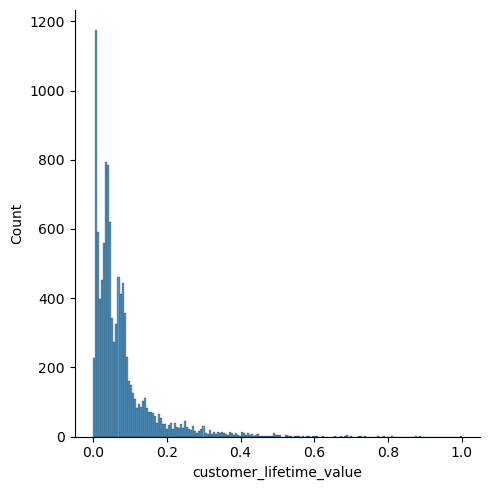

In [80]:
sns.displot(scaled_df["customer_lifetime_value"])

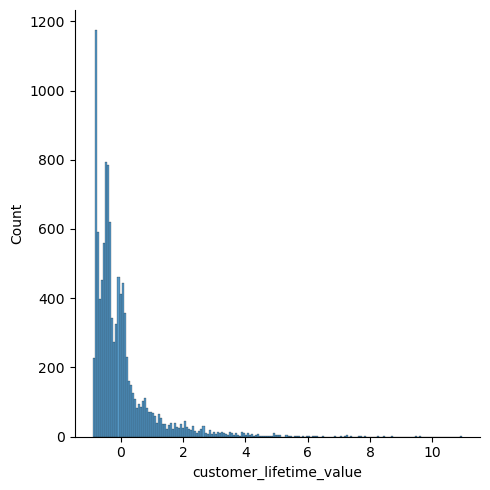

In [81]:
sns.displot(X_num_df["customer_lifetime_value"])

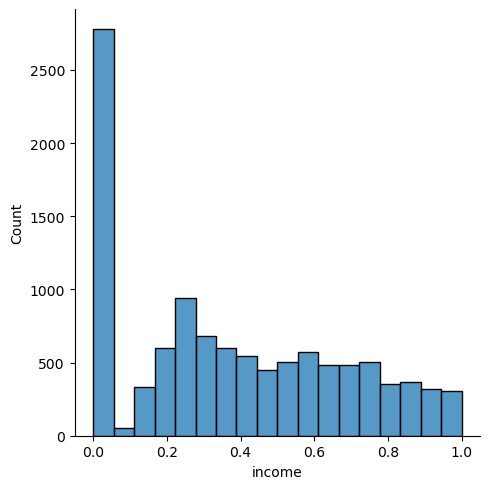

In [82]:
sns.displot(scaled_df["income"])

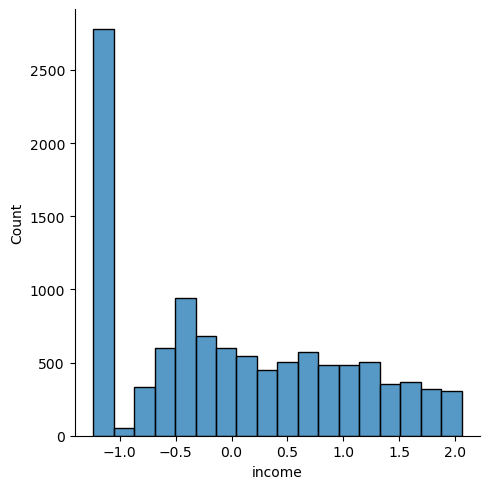

In [83]:
sns.displot(X_num_df["income"])

INSIGHT: After plotting Minmaxscaler and Standard scaler, the graph looks the same.

In [84]:
from sklearn.preprocessing import OneHotEncoder

# Encoding Categorical columns

As we have already scaled numerical columns, now we will encode categorical columns using OneHotEnccoder

In [85]:
X_cat = categorical.drop(["customer", "Months", "effective_to_date"], axis = 1)
X_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


In [86]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

print(X_cat_encode.shape)
X_cat_encode.head()

(10873, 44)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Concatenating Xnum and Xcat dataframes

In [87]:
X = pd.concat([X_cat_encode, X_num_df], axis = 1)
print(X.shape)
display(X.head())
display(y.head())

(10873, 53)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,vehicle_type_nan,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-1.729495,-0.465925,0.345575,-0.935085,-0.825359,0.139685,-0.406617,2.511857,-0.394456
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-1.729177,-0.840779,-1.236372,-0.848010,-1.233980,-0.791258,-0.406617,-0.824755,-0.394456
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.728860,1.006758,-0.507172,0.196885,1.932832,-0.612231,-0.406617,-0.407678,-0.394456
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,-1.728543,2.079386,0.380126,0.109810,-0.518894,-1.614786,-0.406617,-0.407678,2.535136
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-1.728225,0.146443,-0.456581,0.690308,-0.110273,-0.612231,-0.406617,1.677704,-0.394456


0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: total_claim_amount, dtype: float64

# Splitting data into train set and test set.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8698, 53)
(2175, 53)
(8698,)
(2175,)


In [90]:
X_train.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,vehicle_type_nan,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_rate
8526,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.984493,-0.645730,-1.236372,0.080785,0.400503,-0.648036,-0.406617,-0.824755,-0.394456
603,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-1.538110,-0.245747,-1.236372,-0.122389,-1.131825,1.357073,-0.406617,1.677704,-0.394456
2836,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,-0.828429,-0.608264,-0.602658,0.167860,1.013435,0.748379,-0.406617,-0.824755,-0.394456
6828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.443346,0.347459,-0.570116,0.225910,-0.110273,-0.182564,-0.406617,-0.407678,-0.394456
393,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.604761,-0.542367,0.109579,0.458109,0.094038,0.784185,0.718070,-0.824755,2.535136


In [91]:
y_train.head()

8526    438.661509
603     614.572672
2836    475.200000
6828    523.815839
393     166.937747
Name: total_claim_amount, dtype: float64

# Round 5 - Applying Model

In [92]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [93]:
# Training X_train and y_train to find the patterns and relationship among them. 

lm.fit(X_train,y_train)

LinearRegression()

# Round 6 - Model Validation

# r2 score

In [131]:
from sklearn.metrics import r2_score

# As we have trained in above line, now we will make predictions from X_train dataset.
predictions = lm.predict(X_train)

# Now we will deduce r2 score for train model, to understand the chances of errors.
display(r2_score(y_train, predictions))

# total = 0

# Understanding the difference between actual and predicted test.
# for i, j in zip(y_train, predictions):
#     print(i, j ,abs(i - j))
#     total += abs(i - j)
    
# display(np.mean(total))

0.7679922712587293

In [133]:
# Based on the above linear regression, we will try to predict from X_test dataset.

predictions_test = lm.predict(X_test)

#r2 score  for test model
display(r2_score(y_test, predictions_test))
# predictions_test

# total_test = 0
# # Understanding the difference between actual and predicted test.
# for i ,j in zip(y_test, predictions_test):
    
#     print(i ,j, abs(i- j))
#     total_test += abs(i - j)
    
# print(np.mean(total_test))

0.7869390612238318

INSIGHT: The difference between the r2 score of test and train model is low, so our predictions are quite near to the estimate values.

# Mean Square Error 

In [96]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predictions_test)
mse

18882.118727495497

# Root Mean Square Error

In [97]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

137.41222190000238

# Mean Absolute Error

In [98]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions_test)
mae

96.38952978348418

INSIGHT: The difference between MEA and MSE also seems to be quite reasonable. So may be the chance of error is low

# Approach 1: Improving the model by changing the split size of train test model size

In [99]:
# Changed the split size from 0.2 to 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Observe the change in number of rows. Earlier was 8689 rows for train set

(8154, 53)
(8154,)
(2719, 53)
(2719,)


In [100]:
X_train.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,vehicle_type_nan,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_rate
940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-1.431150,-0.506925,1.824198,0.545183,2.034987,0.032269,-0.406617,-0.824755,-0.394456
9016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.141600,-0.831225,-1.236372,-0.906060,-1.029670,-0.612231,-0.406617,-0.824755,-0.394456
3079,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.751304,-0.365740,-0.494623,-0.586787,0.196193,0.569352,-0.406617,0.009398,2.535136
4219,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,-0.388847,-0.441819,0.236684,0.893482,1.115590,-1.614786,-0.406617,-0.824755,-0.394456
538,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,-1.558740,-0.393439,-1.236372,1.503004,1.422056,0.784185,-0.406617,-0.824755,-0.394456


In [101]:
y_train.head()

940     109.287080
9016    297.600000
3079    350.400000
4219    341.088276
538     358.765757
Name: total_claim_amount, dtype: float64

In [102]:
# Training new train dataset.

lm.fit(X_train, y_train)

LinearRegression()

In [103]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7682482251074649

In [104]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7783512060953546

The score difference of predictions and predictions test is greater than earlier. So the split size of data may be incorrect.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

predictions = lm.predict(X_train)
print(r2_score(y_train, predictions))

predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.7679922712587293


0.7869390612238318

This split also increases the predictions and predictions test r2 score. 

# Approach 2: Removing outliers and applying log transformation on numerical columns to make it more normal distribution

In [106]:
# Function to perform log tranformations.

def log_transform(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [107]:
# Function to filter outliers from a dataframe based on a column's iqr.

def filter_outliers(dataframe, column):
    
    iqr = np.percentile(dataframe[column],75) - np.percentile(dataframe[column],25)
    upper_limit = np.percentile(dataframe[column],75) + 1.5 * iqr
    lower_limit = np.percentile(dataframe[column],25) - 1.5 * iqr
    
    X_num_filtered = dataframe[(dataframe[column]>lower_limit) & (dataframe[column]<upper_limit)]
    
    return X_num_filtered
  

In [108]:
X_num.head()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_rate
0,0,4809.216960,48029,61,7.0,52,0.0,9,0
1,1,2228.525238,0,64,3.0,26,0.0,1,0
2,2,14947.917300,22139,100,34.0,31,0.0,2,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,1
4,4,9025.067525,23675,117,14.0,31,0.0,7,0


<Axes: >

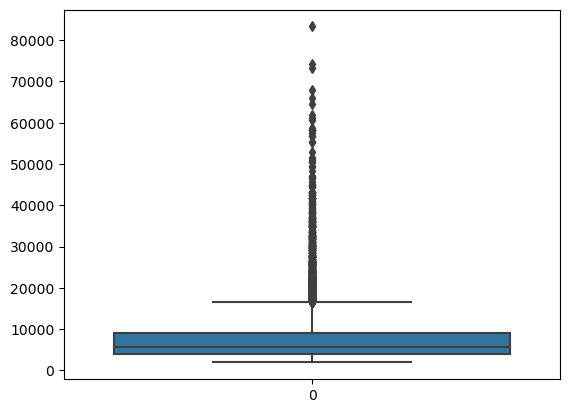

In [109]:
# Checking for outliers.

sns.boxplot(X_num["customer_lifetime_value"])

(9901, 9)

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_5268/2727379797.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_customer_filter["customer_lifetime_value"] = X_customer_filter["customer_lifetime_value"].apply(log_transform)


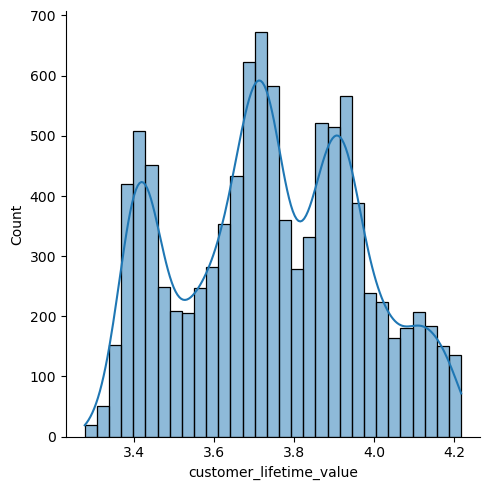

In [110]:
X_customer_filter = filter_outliers(X_num, "customer_lifetime_value")

display(X_customer_filter.shape)
X_customer_filter.head()

# Plotting after filtering outliers.
# sns.displot(X_customer_filter["customer_lifetime_value"], kde = True)

# Plotting after log transformation.
X_customer_filter["customer_lifetime_value"] = X_customer_filter["customer_lifetime_value"].apply(log_transform)

sns.displot(X_customer_filter["customer_lifetime_value"], kde = True)

(10357, 9)

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_5268/935239205.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_premium_filter["monthly_premium_auto"] = X_premium_filter["monthly_premium_auto"].apply(log_transform)


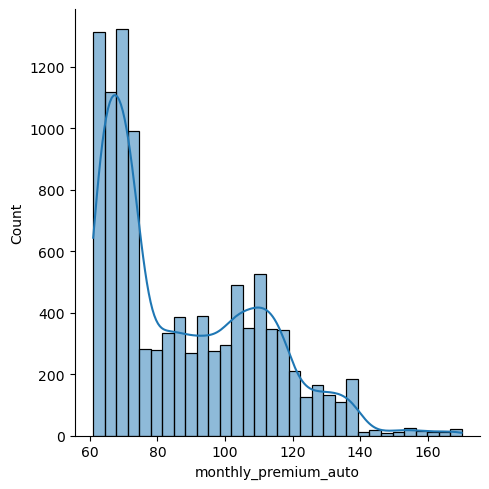

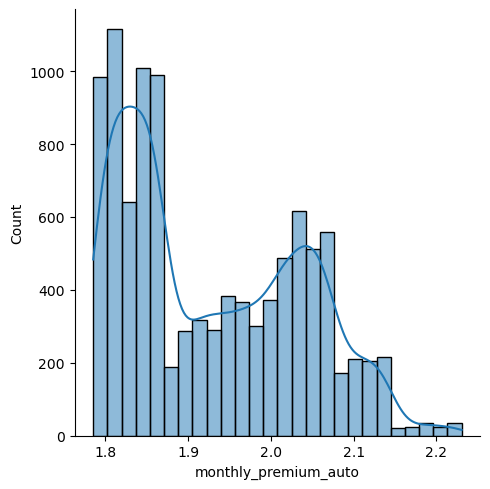

In [111]:
X_premium_filter = filter_outliers(X_num, "monthly_premium_auto")
# 
display(X_premium_filter.shape)
# X_premium_filter.head()

# Plotting after filtering outliers.
sns.displot(X_premium_filter["monthly_premium_auto"], kde = True)

# Plotting after log transformation.
X_premium_filter["monthly_premium_auto"] = X_premium_filter["monthly_premium_auto"].apply(log_transform)

sns.displot(X_premium_filter["monthly_premium_auto"], kde = True)

(10873, 9)

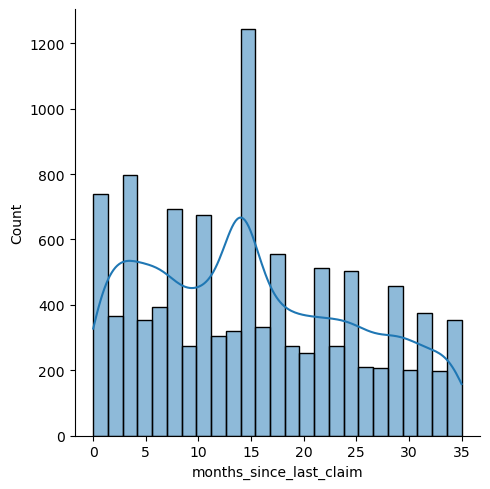

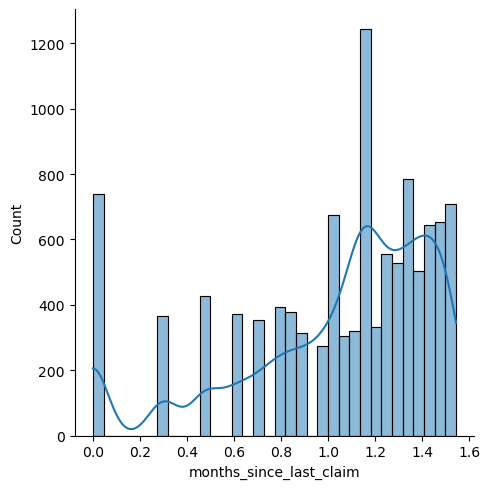

In [112]:
X_last_claim_filter = filter_outliers(X_num, "months_since_last_claim")

display(X_last_claim_filter.shape)
# X_last_claim_filter.head()

# # Plotting after filtering outliers.
sns.displot(X_last_claim_filter["months_since_last_claim"], kde = True)

# Plotting after log transformation.
X_last_claim_filter["months_since_last_claim"] = X_last_claim_filter["months_since_last_claim"].apply(log_transform)

sns.displot(X_last_claim_filter["months_since_last_claim"], kde = True)

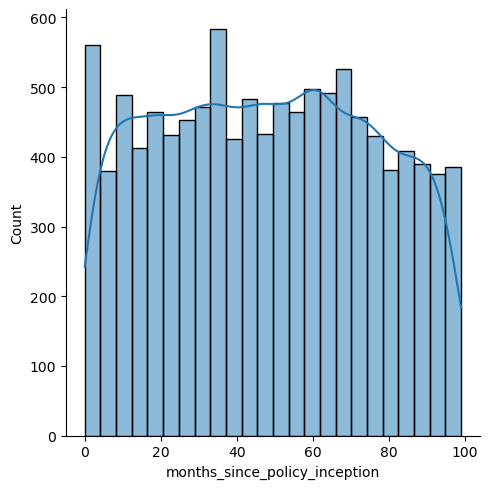

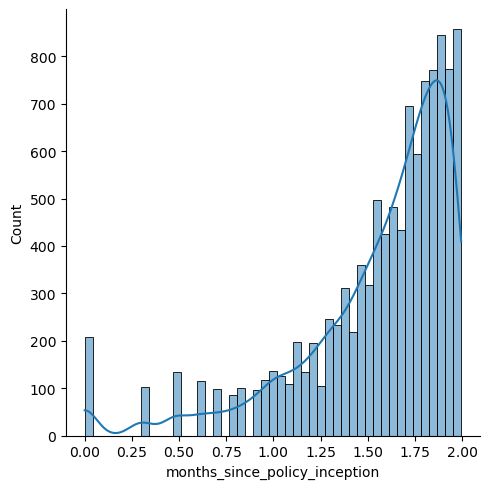

In [113]:
X_inception_filter = filter_outliers(X_num, "months_since_policy_inception")

# display(X_inception_filter.shape)
# display(X_inception_filter.head())

# # Plotting after filtering outliers.
sns.displot(X_inception_filter["months_since_policy_inception"], kde = True)

# Plotting after log transformation.
X_inception_filter["months_since_policy_inception"] = X_inception_filter["months_since_policy_inception"].apply(log_transform)

sns.displot(X_inception_filter["months_since_policy_inception"], kde = True)

/var/folders/yl/blp7v0ys1lzdfkls51wcv3l40000gn/T/ipykernel_5268/1828578166.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_policies_filter["number_of_policies"] = X_policies_filter["number_of_policies"].apply(log_transform)


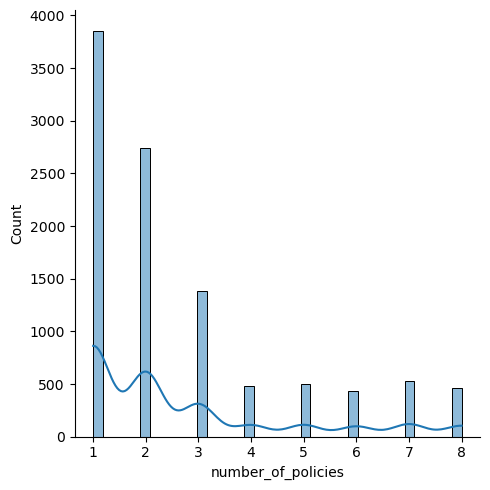

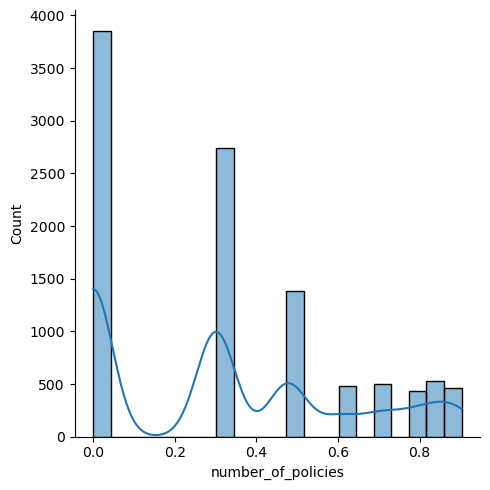

In [114]:
X_policies_filter = filter_outliers(X_num, "number_of_policies")

# display(X_policies_filter.shape)
# X_policies_filter.head()

# # Plotting after filtering outliers.
sns.displot(X_policies_filter["number_of_policies"], kde = True)

# Plotting after log transformation.
X_policies_filter["number_of_policies"] = X_policies_filter["number_of_policies"].apply(log_transform)

sns.displot(X_policies_filter["number_of_policies"], kde = True)

INSIGHT: After filtering different numerical columns and transforming them, the data wasn't transformed into normal distribution curve.

# Round 7 - Reporting

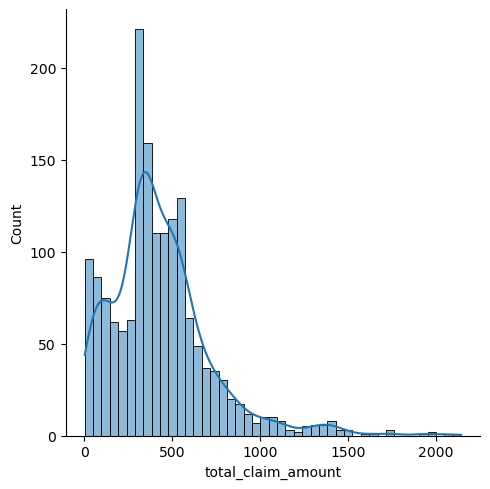

In [134]:
sns.displot(y_test, kde = True)

<Axes: >

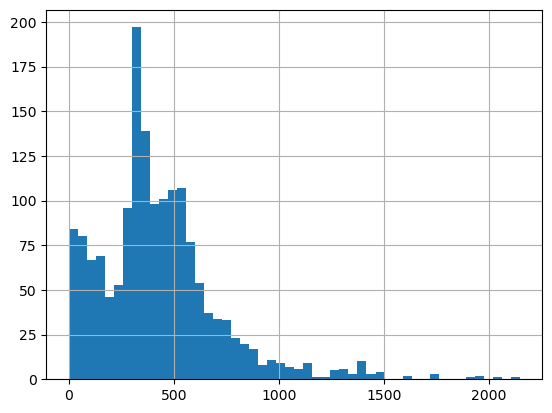

In [138]:
y_test.hist(bins = 50)

##### 

In [139]:
X_test.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,vehicle_type_nan,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_rate
2754,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.855090,-0.465007,1.410308,-0.906060,1.115590,-0.540620,0.718070,0.009398,-0.394456
10209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.521831,-0.765407,1.513961,-0.731911,1.013435,-0.433203,-0.406617,-0.824755,-0.394456
5155,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.091136,0.233516,-0.392221,0.893482,-1.233980,0.784185,1.842757,1.260627,-0.394456
6187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.238313,-0.796941,0.429500,-0.877035,-1.336135,-1.435758,-0.406617,-0.824755,-0.394456
9531,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.306007,-0.551652,0.818786,0.400059,0.911279,0.139685,-0.406617,-0.824755,-0.394456
